This notebook is comparing primary results from 1/4$^{\circ}$ simulations corresponding to two different strength of I-O freshwater flux component. The perturbation simulation (1.5 x I-O freshwater flux) was run from a restart file of the control run at 100 years and the simulations was continued until 150 years.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from xgcm import Grid
import dask 
import dask.distributed
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Comparison of time series of mean energy, T and S.

In [2]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

ds_stat_con = xr.open_mfdataset(ppdir+"ocean.stats*.nc", concat_dim='Time', parallel=True)

ds_stat_per = xr.open_mfdataset(ppdir+"FW_IO_15/ocean.stats*.nc", concat_dim='Time', parallel=True)

In [9]:
dataset_ds = []

files = ["prog_n_10.nc","prog_n_50.nc","prog_n_60.nc","prog_n_80.nc","prog_n_100.nc", 
         "prog_n_125.nc", "prog_n_150.nc"]

for i in range(0, len(files)):
    d = xr.open_dataset(ppdir + files[i], chunks={"Time": 100})
    d1 = d.get(['thetaoga','soga','net_heat_surface','PRCmE'])
    #if(i>1):
    #    d = d.drop('heat_added')
    dataset_ds.append(d1)
        
ds_n = xr.concat(dataset_ds, dim='Time')
    
dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_n_con = xr.merge([ds_n, dsgrid])

ds_n_per = xr.open_mfdataset(ppdir+"FW_IO_15/prog_n*.nc",concat_dim='Time', parallel=True, decode_times=False)
ds_n_per = xr.merge([ds_n_per, dsgrid])

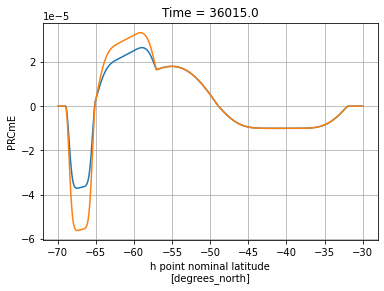

In [10]:
ds_n_con['PRCmE'].isel(Time=0).mean('xh').plot()
ds_n_per['PRCmE'].isel(Time=0).mean('xh').plot()
plt.grid()

Text(0, 0.5, 'Domain Mean Salinity (psu)')

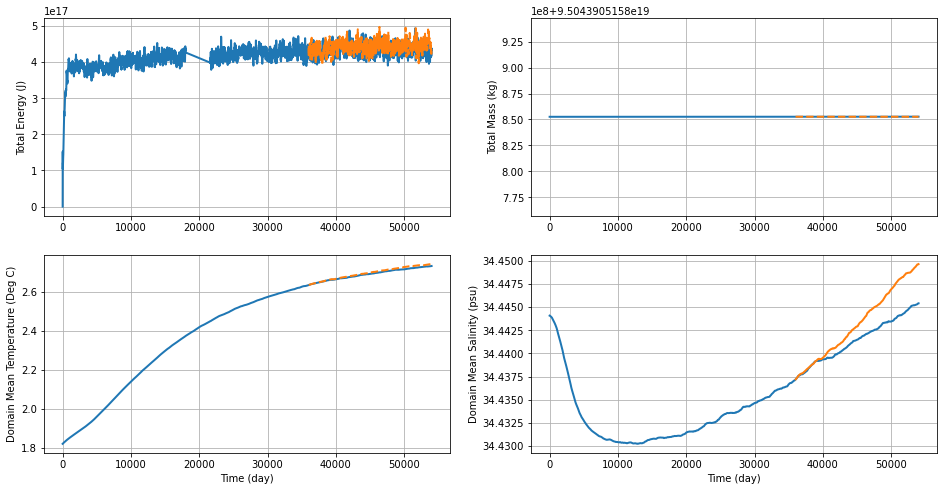

In [6]:
# create tiem array for time series
a = np.arange(15,17986,30)
b = np.arange(18000,36000,1)
c = np.arange(36015,54000,30)

tim = np.concatenate((a, b, c), axis=None)

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.plot(ds_stat_con['Time']/(24*3600*1e9), ds_stat_con['En'], lw=2, ls='-')
plt.plot(ds_stat_per['Time']/(24*3600*1e9), ds_stat_per['En'], lw=2, ls='--')
plt.grid()
#plt.xlabel('Time (day)')
plt.ylabel('Total Energy (J)')

plt.subplot(2,2,2)
plt.plot(ds_stat_con['Time']/(1e9*3600*24), ds_stat_con['Mass'], lw=2, ls='-')
plt.plot(ds_stat_per['Time']/(1e9*3600*24), ds_stat_per['Mass'], lw=2, ls='-')
plt.grid()
#plt.xlabel('Time (day)')
plt.ylabel('Total Mass (kg)')

plt.subplot(2,2,3)
plt.plot(tim, ds_n_con['thetaoga'], lw=2, ls='-')
plt.plot(c, ds_n_per['thetaoga'], lw=2, ls='--')
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Temperature (Deg C)')

plt.subplot(2,2,4)
plt.plot(tim, ds_n_con['soga'], lw=2, ls='-')
plt.plot(c, ds_n_per['soga'], lw=2, ls='-')
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Salinity (psu)')

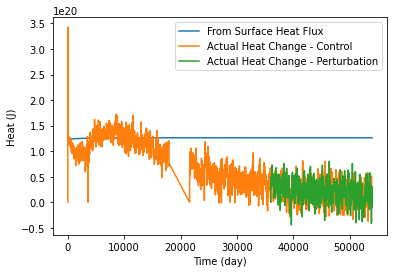

In [12]:
# Heat change

Heat_tot_con = (ds_n_con['net_heat_surface']* ds_n_con['area_t']).sum(['xh','yh'])

#Heat_tot_per = (ds_n_per['net_heat_surface']* ds_n_per['area_t']).sum(['xh','yh'])

plt.plot(tim, Heat_tot_con*10.*24.*3600.)
plt.plot(ds_stat_con['Time']/(1e9*3600*24),ds_stat_con['Heat_chg'])
plt.plot(ds_stat_per['Time']/(1e9*3600*24),ds_stat_per['Heat_chg'])
plt.xlabel('Time (day)')
plt.ylabel('Heat (J)')
plt.legend(['From Surface Heat Flux','Actual Heat Change - Control','Actual Heat Change - Perturbation'])

### Surface and Lat vs Depth Profiles

In [11]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

ds_z_con = xr.open_dataset(ppdir+"prog_z_150.nc")

ds_z_per = xr.open_dataset(ppdir+"FW_IO_15/prog_z_150.nc")

dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_z_con = xr.merge([ds_z_con, dsgrid])
ds_z_per = xr.merge([ds_z_per, dsgrid])

In [5]:
print(ds_z_con)

<xarray.Dataset>
Dimensions:     (Time: 300, nv: 2, xh: 320, xq: 320, yh: 272, yq: 272, z_i: 36, z_l: 35)
Coordinates:
  * xh          (xh) float64 0.125 0.375 0.625 0.875 ... 79.12 79.38 79.62 79.88
  * yh          (yh) float64 -69.94 -69.85 -69.77 ... -30.46 -30.24 -30.02
  * z_l         (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03
  * z_i         (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * Time        (Time) object 0126-01-16 00:00:00 ... 0150-12-16 00:00:00
  * nv          (nv) float64 1.0 2.0
  * xq          (xq) float64 0.25 0.5 0.75 1.0 1.25 ... 79.25 79.5 79.75 80.0
  * yq          (yq) float64 -69.89 -69.81 -69.72 ... -30.35 -30.13 -29.92
Data variables:
    temp        (Time, z_l, yh, xh) float32 ...
    salt        (Time, z_l, yh, xh) float32 ...
    rhopot0     (Time, z_l, yh, xh) float32 ...
    rhopot2     (Time, z_l, yh, xh) float32 ...
    u           (Time, z_l, yh, xq) float32 ...
    v           (Time, z_l, yq, xh) float32 .

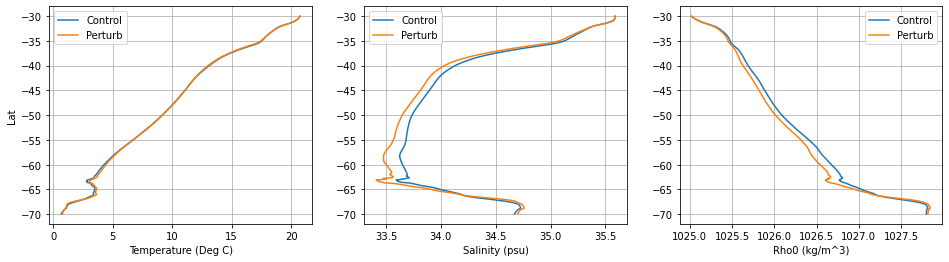

In [6]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
tmp1 = ds_z_con['temp'].isel(z_l=0).mean(['xh','Time'])
tmp2 = ds_z_per['temp'].isel(z_l=0).mean(['xh','Time'])
plt.plot(tmp1, ds_z_con['yh'], label = 'Control')
plt.plot(tmp2, ds_z_per['yh'], label = 'Perturb')
plt.grid()
plt.xlabel('Temperature (Deg C)')
plt.ylabel('Lat')
plt.legend()

plt.subplot(1,3,2)

tmp1 = ds_z_con['salt'].isel(z_l=0).mean(['xh','Time'])
tmp2 = ds_z_per['salt'].isel(z_l=0).mean(['xh','Time'])
plt.plot(tmp1, ds_z_con['yh'], label = 'Control')
plt.plot(tmp2, ds_z_per['yh'], label = 'Perturb')
plt.grid()
plt.xlabel('Salinity (psu)')
plt.legend()

plt.subplot(1,3,3)
tmp1 = ds_z_con['rhopot0'].isel(z_l=0).mean(['xh','Time'])
tmp2 = ds_z_per['rhopot0'].isel(z_l=0).mean(['xh','Time'])
plt.plot(tmp1, ds_z_con['yh'], label = 'Control')
plt.plot(tmp2, ds_z_per['yh'], label = 'Perturb')
plt.grid()
plt.xlabel('Rho0 (kg/m^3)')
plt.legend()

Text(0.5, 1.0, 'Difference')

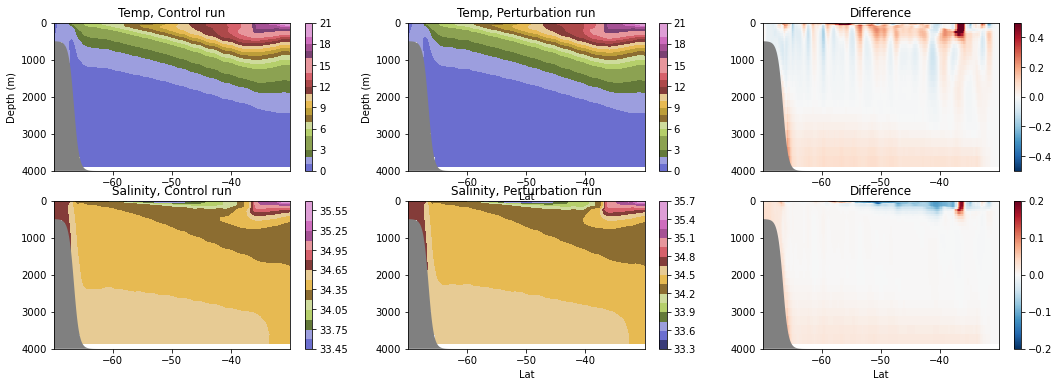

In [16]:
depth = ds_z_con['depth_ocean'].isel(xh=0)

plt.figure(figsize=(18,6))

ds2 = ds_z_con.isel(Time=299, xh=slice(0,100)).mean('xh')

plt.subplot(2,3,1)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.title('Temp, Control run')

plt.subplot(2,3,4)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['salt'], 20, vmin = 33.3, vmax = 35.5, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.title('Salinity, Control run')

ds3 = (- ds_z_con.isel(Time=299, xh=slice(0,100)).mean('xh') + ds_z_per.isel(Time=299, xh=slice(0,100)).mean('xh'))
plt.subplot(2,3,3)
plt.pcolor(ds3['yh'], ds3['z_l'], ds3['temp'], vmin = -0.5, vmax = 0.5, cmap='RdBu_r')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.title('Difference')

ds2 = ds_z_per.isel(Time=299, xh=slice(0,100)).mean('xh')

plt.subplot(2,3,2)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Lat')
plt.title('Temp, Perturbation run')

plt.subplot(2,3,5)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['salt'], 20, vmin = 33.3, vmax = 35.5, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.xlabel('Lat')
plt.title('Salinity, Perturbation run')

plt.subplot(2,3,6)
plt.pcolor(ds3['yh'], ds3['z_l'], ds3['salt'], vmin = -0.2, vmax = 0.2, cmap='RdBu_r')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.xlabel('Lat')
plt.title('Difference')

In [22]:
ds_z_con.close()
ds_z_per.close()

### Overturning Circulation

In [17]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

ds_rho_con = xr.open_dataset(ppdir+"prog_rho2_150.nc")

ds_rho_per = xr.open_dataset(ppdir+"FW_IO_15/prog_rho2_150.nc")

dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_rho_con = xr.merge([ds_rho_con, dsgrid])
ds_rho_per = xr.merge([ds_rho_per, dsgrid])

In [18]:
grid_r = Grid(ds_rho_con, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Rho': {'center': 'rho2_l', 'outer': 'rho2_i'} }, periodic=['X']);

psi_r_con = grid_r.cumsum(ds_rho_con['vmo'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
psi_r_con = psi_r_con.sum('xh')

psi_r_con = psi_r_con / 1035.

grid_r = Grid(ds_rho_per, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Rho': {'center': 'rho2_l', 'outer': 'rho2_i'} }, periodic=['X']);

psi_r_per = grid_r.cumsum(ds_rho_per['vmo'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
psi_r_per = psi_r_per.sum('xh')

psi_r_per = psi_r_per / 1035.

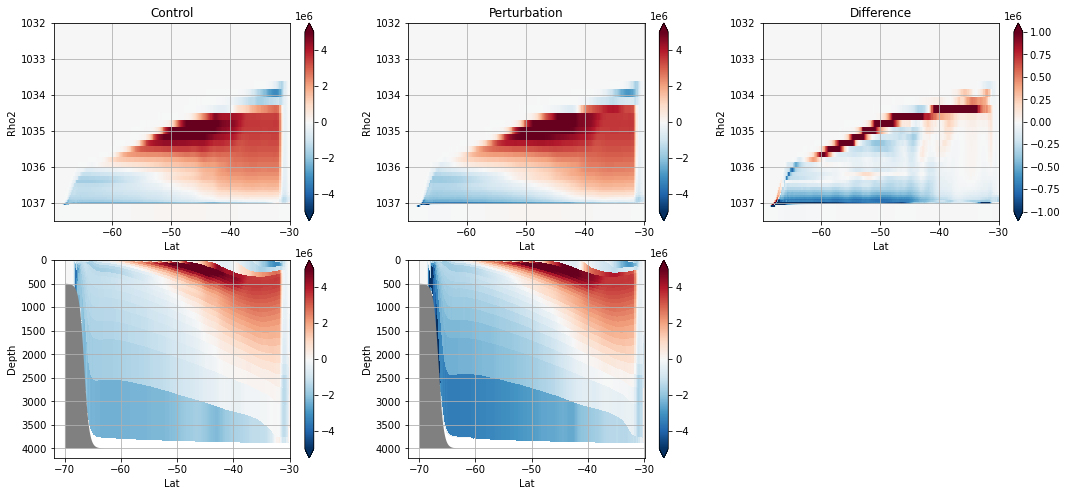

In [21]:
plt.figure(figsize=(18,8))

max_r = 0.5e7

plt.subplot(2,3,1)
plt.pcolor(ds_rho_con['yq'], ds_rho_con['rho2_i'], psi_r_con, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.colorbar(extend='both')
plt.ylabel('Rho2')
plt.title('Control')
#if(ct == 2):
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

plt.subplot(2,3,2)
plt.pcolor(ds_rho_per['yq'], ds_rho_per['rho2_i'], psi_r_per, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.colorbar(extend='both')
plt.ylabel('Rho2')
#if(ct == 2):
plt.xlabel('Lat')
plt.title('Perturbation')
plt.grid()
plt.gca().invert_yaxis()

plt.subplot(2,3,3)
plt.pcolor(ds_rho_con['yq'], ds_rho_con['rho2_i'], psi_r_per - psi_r_con, vmin = -0.2*max_r, vmax = 0.2*max_r, cmap='RdBu_r')
plt.colorbar(extend='both')
plt.ylabel('Rho2')
plt.title('Difference')
#if(ct == 2):
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

z_con = grid_r.cumsum(ds_rho_con['h'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
z_con = grid_r.interp(z_con, 'Y', boundary='fill').mean('xh')

z_per = grid_r.cumsum(ds_rho_per['h'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
z_per = grid_r.interp(z_per, 'Y', boundary='fill').mean('xh')

plt.subplot(2,3,4)
depth = ds_rho_con['depth_ocean'].isel(xh=0)
plt.pcolor(ds_rho_con['yq'], z_con, psi_r_con, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.fill_between(ds_rho_con['yh'], depth, 4000., fc='grey')
plt.colorbar(extend='both')
plt.ylabel('Depth')
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

plt.subplot(2,3,5)
depth = ds_rho_per['depth_ocean'].isel(xh=0)
plt.pcolor(ds_rho_per['yq'], z_per, psi_r_per, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.fill_between(ds_rho_per['yh'], depth, 4000., fc='grey')
plt.colorbar(extend='both')
plt.ylabel('Depth')
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

In [23]:
ds_rho_con.close()
ds_rho_per.close()